In [1]:
import numpy as np # Númerica
import matplotlib.pyplot as plt # Gráficas
from scipy.interpolate import CubicSpline, lagrange, interp1d # Interpolación
from scipy.integrate import quad, dblquad, tplquad, trapezoid, simpson # Integración
import sympy as sp # Símbolos

# ⚠ Importante

👁 Puede usar unicamente las librerias vistas en clase (estas están en la parte superior) en caso de agregar una nueva, debe justificarla.

💀 No está permitido el uso de IA's en caso de hacerlo su parcial será **anulado**!

❗ Comente su código y funciones, esto hace parte de la nota.

✅ Responda ordenadamente y con claridad.


### Nombre: Sara Calle Muñoz

# 1

**(30 puntos)** Sea la función $f(x) = 3^x$,

---

a. Defina una función llamada derivada (ver abajo) que encuentre el valor de la derivada en $x=2$ usando diferencias finitas centrales,

$$
f'(x) ≈ \frac{f(x+h) - f(x-h)}{2h}
$$

con una tolerancia menor a $10^{-8}$ y que retorne el valor de $f'(x=2)$ para cada valor de $h$. Tome con $h$ inicial 0.1.

---

b. Realice un gráfico logaritmico del error absoluto asociado a $f'(x)$ en función de $h$, conociendo que

$$
\frac{d}{dx}(b^x) = b^x\ln b
$$





```python
def derivada(f,x, tol = 1e-8):
'''
Recuerde hacer su documentación
'''

  return valor_derivada, h_valores
```



In [ ]:
#definamos la función para encontrar la derivada
def derivada(f,x, tol = 1e-8):
'''
Calcula la derivada aproximada usando diferencias finitas centrales
Entradas:
f: función a derivar
x: valores para evaluar la derivada
retorna:
el valor de la derivada aproximado
'''
error = 1.0
h = (b - a) / 2
h_values = []
x = np.array([2])
while error > tol:


 valor derivada = (f(x+h) - f(x-h)) / (2*h)
 return valor_derivada, h_valores


## 2

**(40 puntos)** Considere un fluido viscoso que fluye en régimen laminar a través de una tubería cilíndrica horizontal de radio $R = 1.0\ \text{cm}$. Se ha medido experimentalmente la velocidad axial del fluido en distintos radios desde el centro de la tubería ($r = 0$) hasta la pared ($r = R$). Los datos obtenidos son:

| $r$ (cm) | $v(r)$ (cm/s) |
|----------|---------------|
| 0.0      | 2.00          |
| 0.2      | 1.92          |
| 0.4      | 1.68          |
| 0.6      | 1.28          |
| 0.8      | 0.72          |
| 1.0      | 0.00          |

Con base en estos datos responda:

---

**a.** Encuentre una expresión para el polinomio interpolador de **Lagrange** para $v(r)$.

---

**b.** Usando las funciones obtenidas por **Lagrange** y **CubicSpline**, haga un gráfico donde se muestre el comportamiento de ambas interpolaciones, comparándolas con los datos experimentales.

---

**c.** Calcule la derivada $\frac{dv}{dr}$, correspondiente al **gradiente de velocidad radial** usando los datos procedentes de la interpolación CubicSpline. Use `np.gradient` con $h = 10^{-4}$.

---

**d.** Determine el **esfuerzo cortante** en el fluido, dado por:

$$
\tau(r) = \mu \frac{dv}{dr},
$$

donde $\mu = 0.001\ \text{Pa}\cdot\text{s}$ es la viscosidad dinámica del fluido. Grafique $\tau(r)$ para $r \in [0, 1]$.

---



In [15]:
# datos
r = np.array([0.0, 0.2, 0.4, 0.6, 0.8, 1.0]) #en cm
v = np.array([2.00, 1.92, 1.68, 1.28, 0.72, 0.00]) #en cm/s

#calculemos el polinomio de lagrange
pol_lagrange = lagrange(r, v)
#print(f'El polinomio de interpolación de Lagrange para v(r) es: {pol_lagrange}')

#calculemos el polinomio utilizando cubicspline
pol_spline = CubicSpline(r, v)
#print(f'El polinomio de interpolación de Lagrange para v(r) es: {pol_spline}')

In [11]:
CubicSpline?

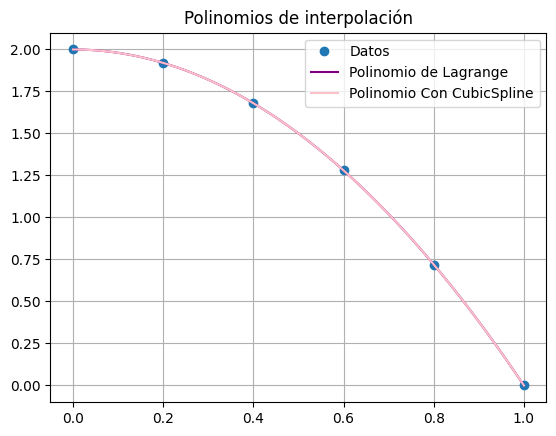

In [74]:
x_interp = np.linspace(min(r), max(r), 100) #puntos para interpolar

#graficamos
plt.plot(r, v, 'o', label='Datos')
plt.plot(x_interp, pol_lagrange(x_interp), label='Polinomio de Lagrange', color ='purple')
plt.plot(x_interp, pol_spline(x_interp), label='Polinomio Con CubicSpline', color ='pink')
plt.title("Polinomios de interpolación")
plt.legend()
plt.grid()

In [28]:
np.gradient?

In [44]:
#calculemos dv/dr
h = 1e-4
r_i = np.arange(min(r), max(r)+h, h)
fprime = np.gradient(pol_spline(r_i), h, edge_order=2)
print(f'{fprime}')

[-5.45696821e-12 -4.00000000e-04 -8.00000000e-04 ... -3.99920000e+00
 -3.99960000e+00 -4.00000000e+00]


[-5.45696821e-15 -4.00000000e-07 -8.00000000e-07 ... -3.99920000e-03
 -3.99960000e-03 -4.00000000e-03]


/tmp/ipython-input-84-3485167617.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


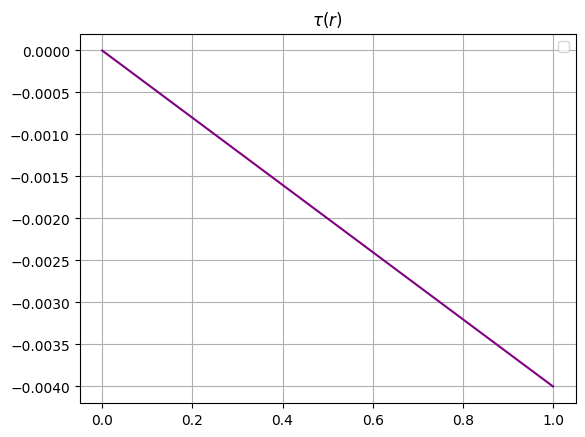

In [84]:
#determinemos el esfuerzo cortante en el fluido
u = 0.001 #en Pa*s
esfuerzo = u*fprime
print(f'{esfuerzo}')

#graficamos
x = np.linspace(0, 1, len(r_i))
plt.plot(x, esfuerzo, color ='purple')
plt.title('$\\tau(r)$')
plt.grid()
plt.legend()

# 3

**(30 puntos)** Considere un sólido tetraédrico $R$ delimitado por los planos:

- $x = 0$, $y = 0$, $z = 0$,  
- y el plano $x + y + z = 1$.

Este sólido ocupa una región en el primer octante y está contenido completamente dentro del cubo unidad.

La densidad del sólido es variable y está dada por $\rho(x, y, z) = xyz$ [kg/m³].

Considere:


$$
\iiint_R f(x,y,z)\, dV = \int_0^1 \int_0^{1-x} \int_0^{1-x-y} f(x,y,z)\, dz\, dy\, dx
$$

con

$$
dV = dz\,dy\,dx
$$

---

a. Calcule la **masa total** del sólido:

$$
m = \iiint_R \rho(x, y, z)\, dV.
$$

Usando la forma iterativa de `quad`, compare su resultado con `tplquad`.

---

b. Calcule el **momento de inercia respecto a los ejes $x$ y $z$**, definidos como:

$$
I_z = \iiint_R (x^2 + y^2)\, \rho(x, y, z)\, dV.
$$

$$
I_x = \iiint_R (y^2 + z^2)\, \rho(x, y, z)\, dV.
$$

Puede usar la forma iterativa de `quad` o `tplquad`.





In [64]:
#calculemos la masa total, primero utilizando quad
def integral_interna(y, x):
  integrando = lambda z: x*y*z
  res, _ = quad(integrando, 0, 1-x-y)
  return res

def integral_intermedia(x):
  integrando = lambda y: integral_interna(y, x)
  res, _ = quad(integrando, 0, 1-x)
  return res

integral_quad, _ = quad(integral_intermedia, 0, 1)
print(f'La integral usando quad es {integral_quad}')


La integral usando quad es 0.001388888888888889


In [67]:
#ahora usando tlpquad
f = lambda z, y, x: x*y*z
a = lambda x: 0
b = lambda x: 1- x
c = lambda x, y: 0
d = lambda x,y: 1-x-y

integral_tlpquad, _ = tplquad(f, 0, 1, a, b, c, d )
print(f'La integral usando tlpquad es: {integral_tlpquad}')

#la diferencia entre ambos métodos
error = abs(integral_quad - integral_tlpquad)
print(f'El error es {error}') #no se

La integral usando tlpquad es: 0.001388888888888889
El error es 0.0


In [71]:
#ahora calculemos el momento de inercia para z
f = lambda z, y, x: (y**2 + z**2)*(x*y*z)
a = lambda x: 0
b = lambda x: 1- x
c = lambda x, y: 0
d = lambda x,y: 1-x-y

momento_z, _ = tplquad(f, 0, 1, a, b, c, d)
print(f'El momento de inercia en x usando tlpquad es: {momento_z}')

El momento de inercia en x usando tlpquad es: 0.00029761904761904765


In [72]:
#ahora calculemos el momento de inercia para x
f = lambda z, y, x: (x**2 + y**2)*(x*y*z)
a = lambda x: 0
b = lambda x: 1- x
c = lambda x, y: 0
d = lambda x,y: 1-x-y

momento_x, _ = tplquad(f, 0, 1, a, b, c, d)
print(f'El momento de inercia en x usando tlpquad es: {momento_x}')

El momento de inercia en x usando tlpquad es: 0.00029761904761904765
